In [245]:
import pandas as pd
import csv
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('indonesian')

df = pd.read_csv('data\data.csv', encoding='iso-8859-1')
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\666Rakels\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [246]:
df[['Tweet']]

,Tweet
0,- disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...
2,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4,USER USER Kaum cebong kapir udah keliatan dong...
...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...
13165,USER Kasur mana enak kunyuk'
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...
13167,USER USER USER USER Bom yang real mudah terdet...


In [247]:
df['Tweet'] = df['Tweet'].replace(to_replace=r"((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))|\s|\W|rt|RT|USER|user|xfxfxx[\s]+|@[^s]+|\d|_",value=r" ", regex = True).str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)])).drop_duplicates()
df[['Tweet']]


,Tweet
0,disaat cowok berusaha melacak perhatian gue lo...
1,telat ngasih tau elu edan sarap gue bergaul ci...
2,kadang berfikir percaya tuhan jatuh berkali ka...
3,n nku tau matamu sipit diliat
4,kaum cebong kapir udah keliatan dongoknya dong...
...,...
13164,ngomong ndasmu congor lu yg sekate anjyng
13165,kasur enak kunyuk
13166,hati hati bisu g n nlagi bosan huft xf x f x xaa
13167,bom real mudah terdeteksi bom terkubur dahsyat...


In [248]:
a = df[(df.HS_Weak == 1)].HS_Weak.sum()
b = df[(df.HS_Moderate == 1)].HS_Moderate.sum()
c = df[(df.HS_Strong == 1)].HS_Strong.sum()
d = df[(df.HS_Individual == 1)].HS_Individual.sum()
e = df[(df.HS_Group == 1)].HS_Group.sum()
f=d+e
print(f)

5561


Text(0.5, 1.0, 'Types of Tweets on Indonesians Twitter Based on Hate Speech Content')

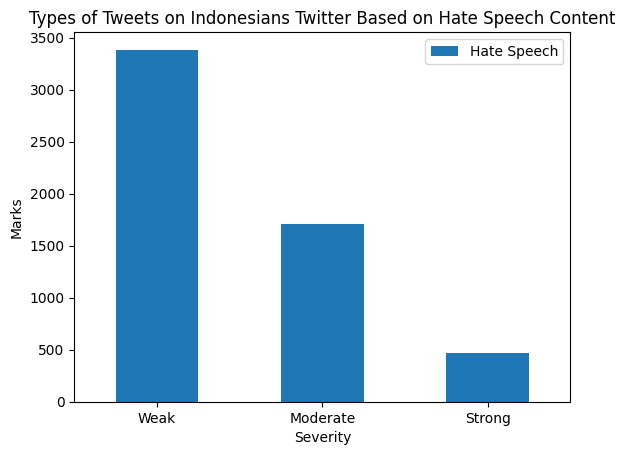

In [249]:
df = pd.DataFrame({'Severity':['Weak', 'Moderate', 'Strong'], 'Hate Speech':[a, b, c]})
ax = df.plot.bar(x='Severity', y='Hate Speech', rot=0)
plt.ylabel('Marks')
plt.title("Types of Tweets on Indonesians Twitter Based on Hate Speech Content")

Text(0.5, 1.0, 'Target of Tweets on Indonesians Twitter Based on Hate Speech Content')

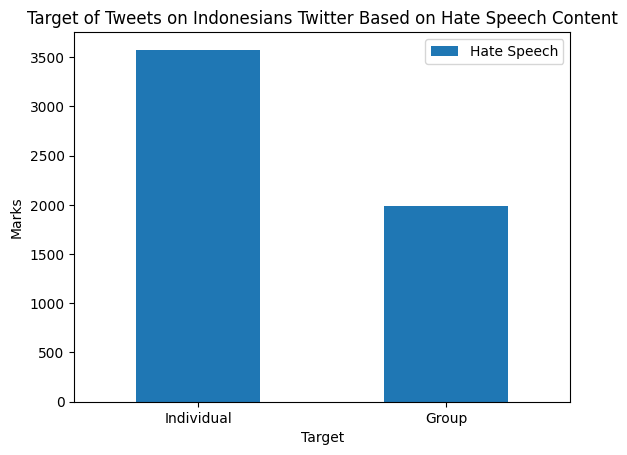

In [250]:
df = pd.DataFrame({'Target':['Individual', 'Group'], 'Hate Speech':[d, e]})
ax = df.plot.bar(x='Target', y='Hate Speech', rot=0)
plt.ylabel('Marks')
plt.title("Target of Tweets on Indonesians Twitter Based on Hate Speech Content")